## Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('laggedchoice_data_car_driver_choices_cleaned.csv')

In [3]:
# Display the first few rows of the dataset to understand its structure
data.head()

,driver_tag,time_tag,dist_ahead,time_of_impact,num_of_det_vehicles,veh_flag,gps_speed,overspeeding,min_age,max_age,...,alpha_42,alpha_43,alpha_51,alpha_52,alpha_53,alpha_61,alpha_63,is_aggressive,is_drowsy,is_normal
0,11,0,-1.0,-1.0,0,0,65.033333,0,40,50,...,0,0,0,0,0,0,0,0,0,1
1,11,1,-1.0,-1.0,0,0,68.633333,0,40,50,...,0,0,0,0,0,0,0,0,0,1
2,11,2,-1.0,-1.0,0,0,71.222222,0,40,50,...,0,0,0,0,0,0,0,0,0,1
3,11,3,-1.0,-1.0,0,0,74.344444,0,40,50,...,0,0,0,0,0,0,0,0,0,1
4,11,4,-1.0,-1.0,0,0,77.111111,0,40,50,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Define the behaviors based on the description
behaviors = {
    1: "Normal Behavior",
    2: "Aggressive Behavior",
    3: "Drowsy Behavior"
}

# Get unique driver tags
unique_driver_tags = sorted(data['driver_tag'].unique())

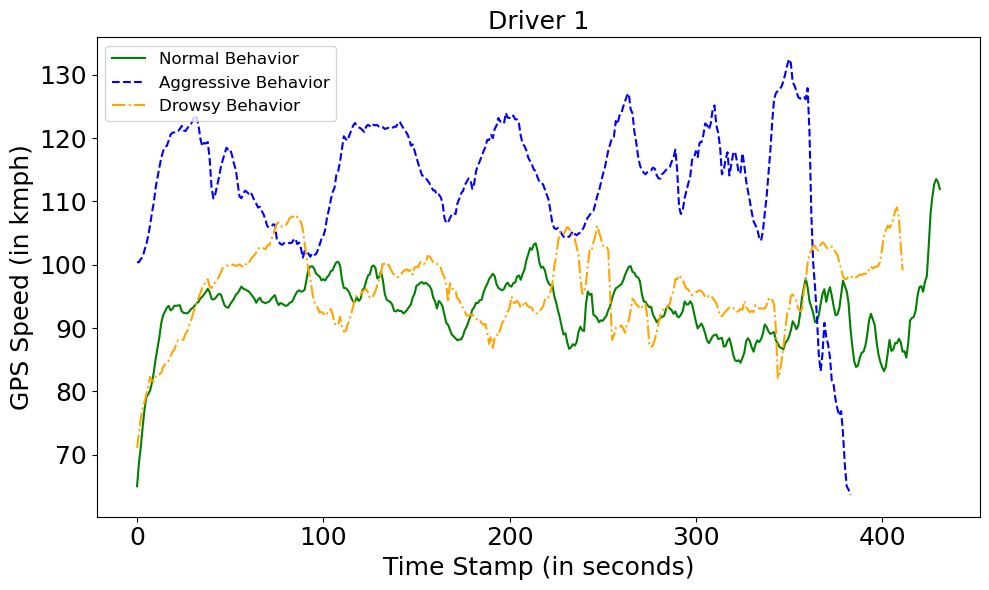

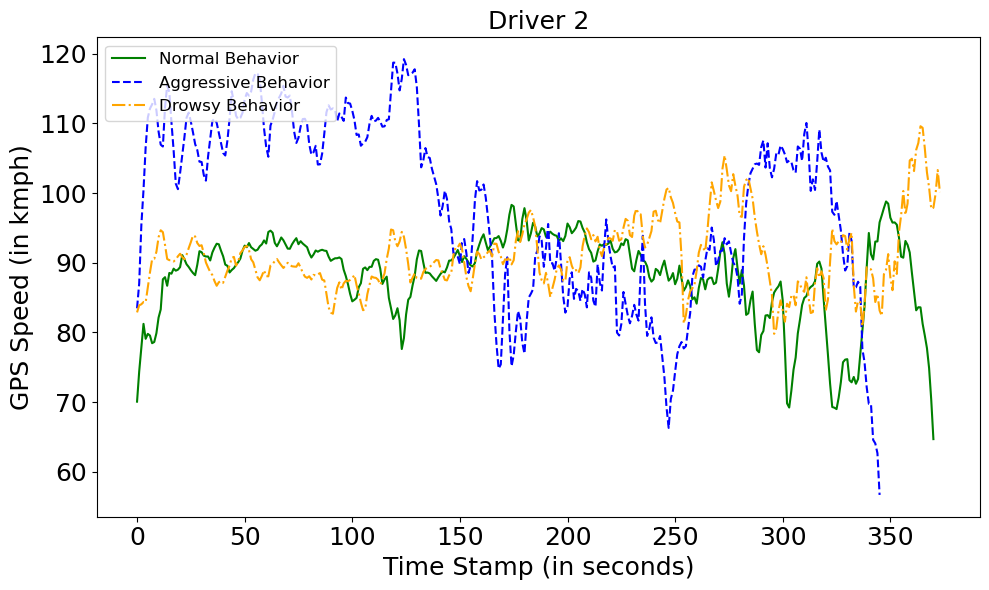

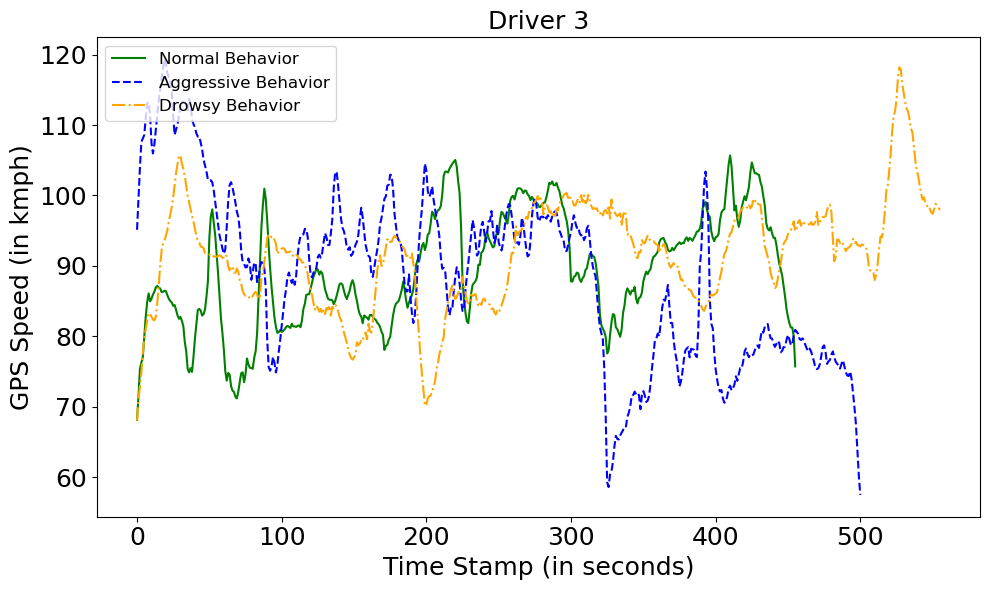

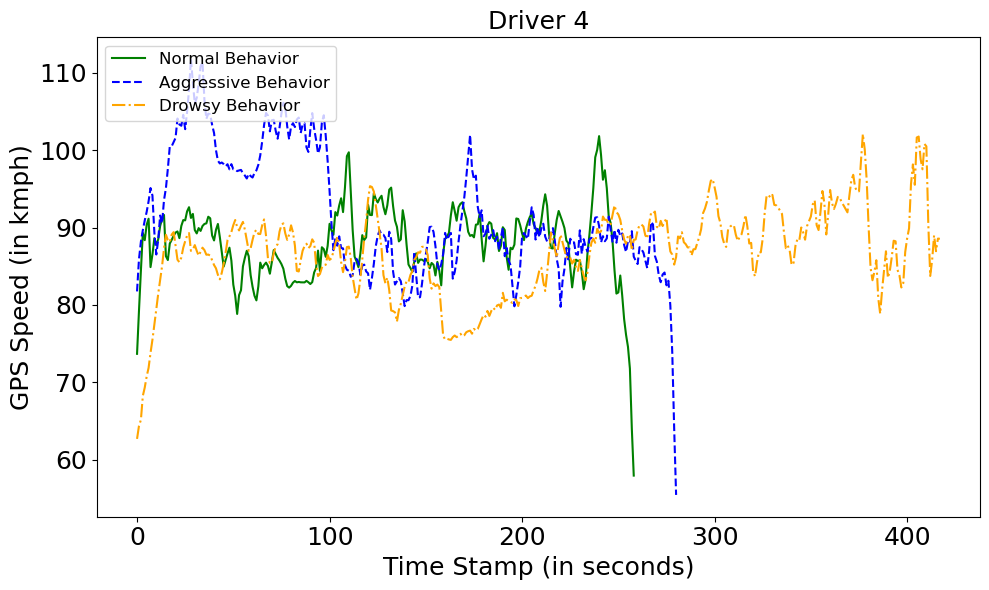

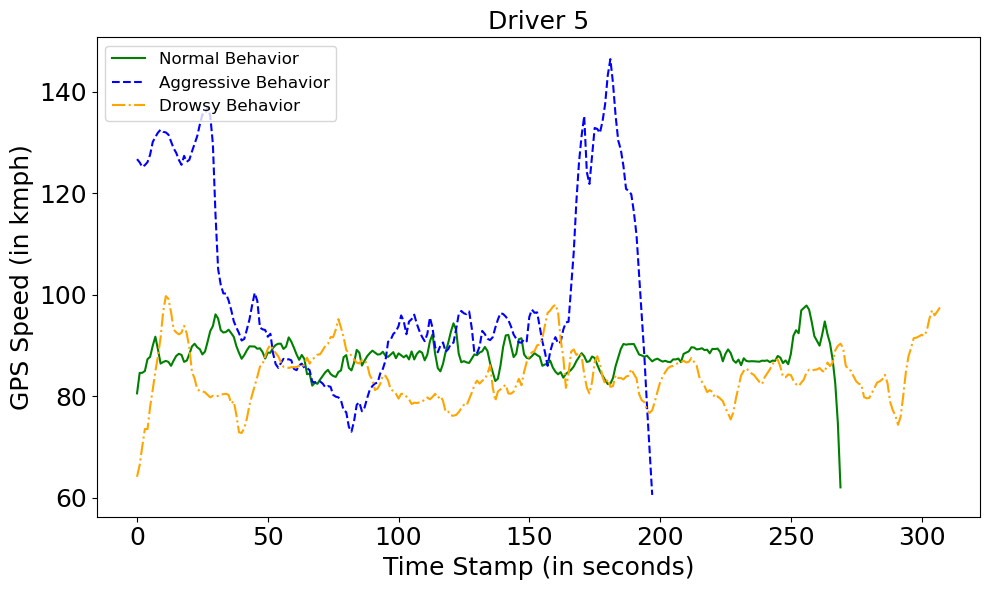

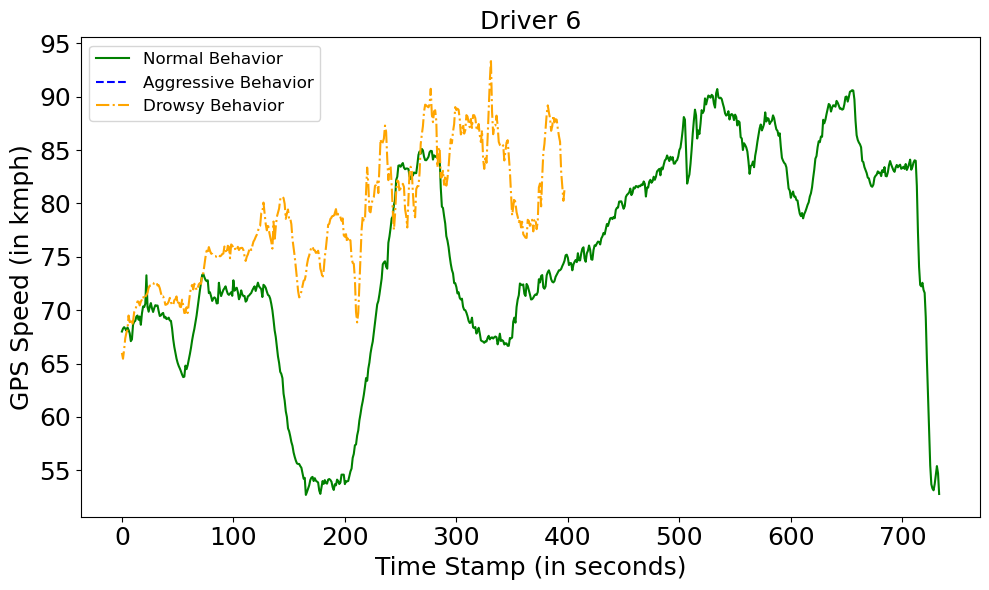

In [5]:
# Define the function to plot the data for each driver with modifications
def plot_driver_data_modified(driver_number):
    # Filter data for the given driver
    driver_data = data[(data['driver_tag'] // 10) == driver_number]
    
    # Define colors and line styles for each behavior
    colors = {
        1: "green",
        2: "blue",
        3: "orange"
    }
    linestyles = {
        1: "-",
        2: "--",
        3: "-."
    }
    
    # Create a single plot for the driver
    plt.figure(figsize=(10, 6))
    
    for behavior in behaviors.keys():
        behavior_data = driver_data[driver_data['driver_tag'] % 10 == behavior]
        plt.plot(behavior_data['time_tag'], behavior_data['gps_speed'], 
                 label=behaviors[behavior], 
                 color=colors[behavior], 
                 linestyle=linestyles[behavior])
    
    # Set title, labels, and legend
    plt.title(f"Driver {driver_number}", fontsize=18)
    plt.xlabel("Time Stamp (in seconds)", fontsize=18)
    plt.ylabel("GPS Speed (in kmph)", fontsize=18)
    plt.legend(loc="upper left", fontsize='large')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.show()

# Plot data for each driver
for driver_number in range(1, 7):
    plot_driver_data_modified(driver_number)

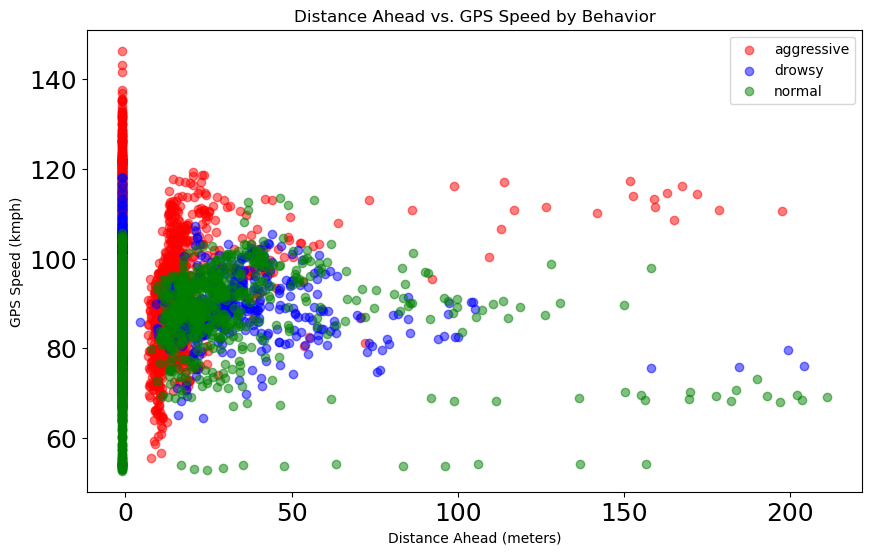

In [6]:
# Extract the necessary columns for plotting
scatter_data = data[['dist_ahead', 'gps_speed', 'is_aggressive', 'is_drowsy', 'is_normal']]

# Define behavior colors
colors = {
    'is_aggressive': 'red',
    'is_drowsy': 'blue',
    'is_normal': 'green'
}

plt.figure(figsize=(10, 6))

# Plot data for each behavior
for behavior, color in colors.items():
    subset = scatter_data[scatter_data[behavior] == 1]
    plt.scatter(subset['dist_ahead'], subset['gps_speed'], color=color, label=behavior[3:], alpha=0.5)

plt.xlabel('Distance Ahead (meters)')
plt.ylabel('GPS Speed (kmph)')
plt.title('Distance Ahead vs. GPS Speed by Behavior')
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

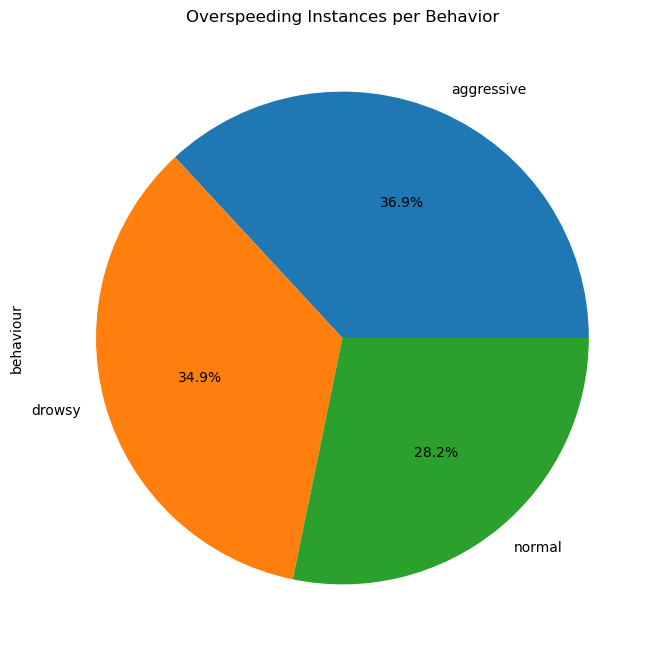

In [7]:
# Overspeeding Instances:
## Pie chart:
overspeed_counts = data[data['overspeeding'] == 1]['behaviour'].value_counts()
overspeed_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Overspeeding Instances per Behavior')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

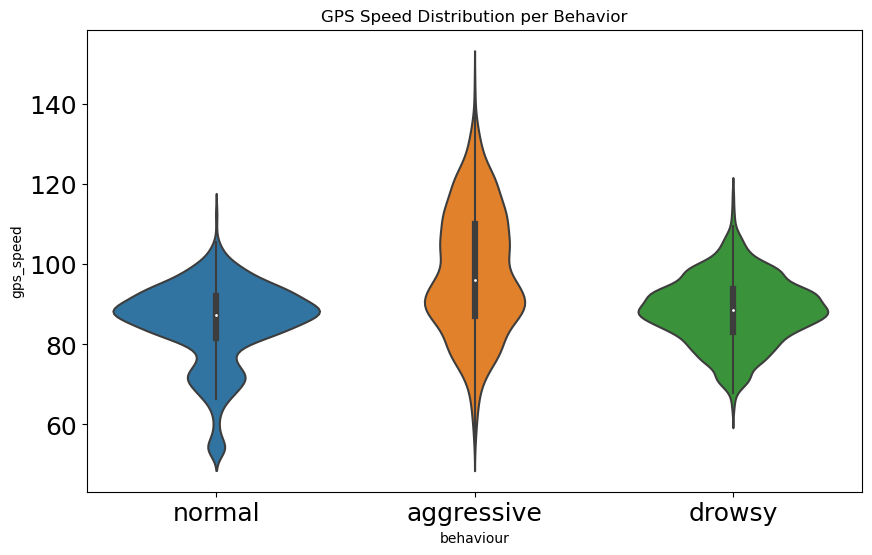

In [8]:
## GPS Speed vs. Behavior:
## Violin plot:
plt.figure(figsize=(10, 6))
sns.violinplot(x='behaviour', y='gps_speed', data=data, order=['normal', 'aggressive', 'drowsy'])
plt.title('GPS Speed Distribution per Behavior')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()